In [ ]:
ip_list={'192.168.70.29':'정충원','192.168.70.100': '이호열'}

In [ ]:
from flask import Flask,request

#app :Server 실행, 경로를 잡아주는 객체
app= Flask(__name__)

@app.route('/')
def index():
    
    ip=request.remote_addr
    
    if ip=='192,168,70,100':
        return '호열님 방가 방가'
    else:
        return '<h1>Hello Word</h1>'
    
if __name__== '__main__':
    app.run(host='192.168.70.29', port=5021)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://192.168.70.29:5021/ (Press CTRL+C to quit)
192.168.70.29 - - [21/Sep/2022 12:49:14] "GET / HTTP/1.1" 200 -


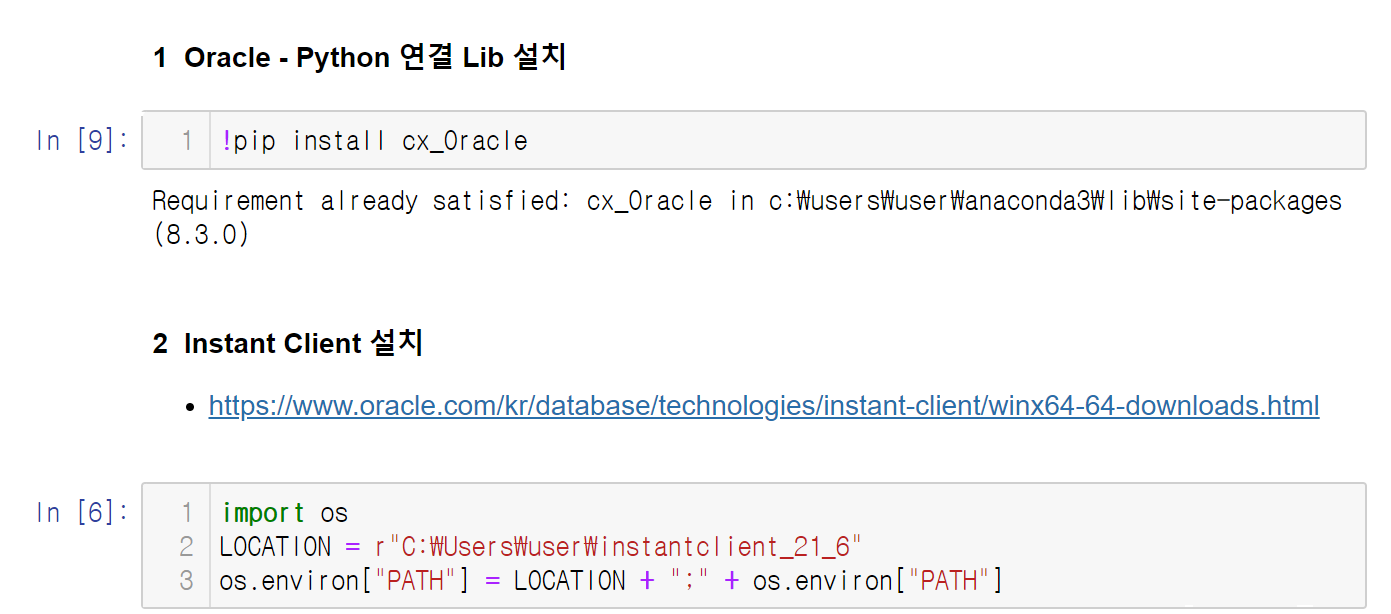

In [1]:
!pip install cx_Oracle

In [2]:
import os
LOCATION=r"C:\Users\AI\instantclient_21_6"
os.environ['PATH']=LOCATION+";"+os.environ['PATH']

In [8]:
import cx_Oracle

# DB 연결
- 1) Connection
- 2) Cursor
- 3) Execute
- 4) Close

In [7]:
#connection
db_id='hr'
db_pw='hr'
db_url='127.0.0.1:1521/xe'

conn=cx_Oracle.connect(db_id,db_pw,db_url)

#2.Cursor
curs=conn.cursor()

#3.execute
sql='select last_name, salary from employees'
result= curs.execute(sql)
result.fetchall()

#4. Close
#연결 통로를 닫을 때는, 열었던 역순으로 닫는다
if curs != None:
    curs.close()
if conn !=None:
    conn.close()

In [32]:
import cx_Oracle
import pandas as pd

class DAO:
        
    def select(self):
        db_id='hr'
        db_pw='hr'
        db_url='127.0.0.1:1521/xe'
        conn = cx_Oracle.connect(db_id, db_pw, db_url)
        
        curs=conn.cursor()
        
        sql='select last_name, salary from employees'
        
        result= curs.execute(sql)
        r=result.fetchall()
        
        if curs != None:curs.close()
        if conn != None:conn.close()
            
        return r
    
    def select_df(self):
        conn, curs=self.conn_db()
   
        sql='select * from member' 
        #'select last_name , salary from employees'
        df=pd.read_sql(sql,conn)
        conn.close()
        return df
    
    def conn_db(self):
        db_id='hr'
        db_pw='hr'
        db_url='127.0.0.1:1521/xe'
        conn=cx_Oracle.connect(db_id, db_pw, db_url)
    
        curs=conn.cursor()
        return conn, curs
    
    def insert(self, join_id, join_pw, join_name):
        conn, curs= self.conn_db()
        sql='''insert into member(memid, id, pw, name) 
        values(mem_memid_seq.nextval, :1, :2, :3)'''
        result= curs.execute(sql, (join_id, join_pw, join_name ))
        print(result)
        
        conn.commit()
        if curs !=None:
            curs.close()
        if conn !=None:
            conn.close()
            
    def login(self, login_id,login_pw):
        conn, curs= self.conn_db()
        
        sql='''select count(*) from member where id = :1 and pw= :2 '''
        result=curs.execute(sql,(login_id,login_pw))
        cnt=result.fetchone()
        
        if curs !=None:
            curs.close()
        if conn !=None:
            conn.close()
        print(cnt[0])
        
        return cnt[0]
    
    def check(self, join_id):
        conn, curs= self.conn_db()
        
        sql='''select count(*) from member where id = :1 '''
        result=curs.execute(sql,(join_id,)
        cnt=result.fetchone()
        
        if curs !=None:
            curs.close()
        if conn !=None:
            conn.close()
        print(cnt[0])
        
        return cnt[0]
        

In [33]:
dao=DAO()
dao.check('jcw')

DatabaseError: ORA-01036: illegal variable name/number

In [1]:
# 전에 만든 코드 
import cx_Oracle
import pandas as pd
class DAO:
    def conn_db(self):
        db_id = 'hr'
        db_pw = 'hr'
        db_url = '127.0.0.1:1521/xe'
        conn = cx_Oracle.connect(db_id, db_pw, db_url)
        curs = conn.cursor()
        return conn, curs
    def select(self):
        conn, curs = self.conn_db()
        sql = 'select last_name, salary from employees'
        result = curs.execute(sql)
        r = result.fetchall()
        if curs != None:
            curs.close()
        if conn != None:
            conn.close()
        return r
    def select_df(self):
        conn, curs = self.conn_db()
        sql = 'select * from member'
        df = pd.read_sql(sql, conn)
        conn.close()
        return df
    def insert(self, join_id, join_pw, join_name):
        conn, curs = self.conn_db()
        sql = '''insert into member(memid, id, pw, name)
                values (mem_memid_seq.nextval, :1, :2, :3)'''
        curs.execute(sql, (join_id, join_pw, join_name))
        conn.commit()
        if curs != None:
            curs.close()
        if conn != None:
            conn.close()

In [22]:
import pandas as pd

In [50]:
dao=DAO()
#df=dao.select_df()
dao.login('jcw','1234')

1


1

In [49]:
dao=DAO()
dao.insert('jcg', '1234', 'chungguen1')

dao.select_df()

IntegrityError: ORA-00001: unique constraint (HR.MEMBER_UK1) violated

In [ ]:
df1.dao.select_df()

In [31]:
from flask import Flask,request, redirect
app=Flask(__name__)

@app.route('/')
def index():
    return '<h1>Hello World</h1>'

@app.route('/join', methods=['POST'])
def join():
    
    if request.method=='POST':
        join_id=request.form['join_id']
        join_pw=request.form['join_pw']
        join_name=request.form['join_name']
        print(join_id,join_pw,join_name)
        dao=DAO()
        
        try:
            dao.insert(join_id, join_pw, join_name)
            return redirect('/')
        except:
            return redirect('http://192.168.70.169:5036/index.html')

@app.route('/check', methods=['POST'])
def check_id():
    if request.method=='POST':
        join_id=request.form['join_id']
        
        dao=DAO()
        cnt=dao.check(join_id)
        return cnt
    
    
@app.route('/login', methods=['GET','POST'])
def login_db():
    if request.method=='POST':
        login_id=request.form['login_id']
        login_pw=request.form['login_pw']

        print(login_id, login_pw)
        dao=DAO()
        cnt=dao.login(login_id, login_pw)
        print(type(cnt))
        
        if cnt==1:
            url_success='http://ewise.dothome.co.kr/success.html'
            return redirect(url_success)
        else:
            url_fail='http://ewise.dothome.co.kr/fail.html'
            return redirect(url_fail)
        
        
    return ' 로그인 페이지 입니다. '

if __name__=='__main__':
    app.run(host='192.168.70.169',port=5036)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://192.168.70.169:5036/ (Press CTRL+C to quit)
192.168.70.169 - - [26/Sep/2022 11:18:04] "POST /check HTTP/1.1" 400 -
192.168.70.169 - - [26/Sep/2022 11:19:29] "POST /check HTTP/1.1" 400 -
192.168.70.169 - - [26/Sep/2022 11:19:32] "POST /check HTTP/1.1" 400 -


In [35]:
dao=DAO()
df1=dao.select_df()

df1[df1['LAST_NAME'] == 'Grant']

#df1[df1['SALARY']>10000]

C:\Users\AI\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,LAST_NAME,SALARY
78,Grant,7000.0
99,Grant,2600.0


In [13]:
dao=DAO()
r= dao.select()

for name, salary in r:
    print('name:{} / salary: {}'.format(name,salary))

name:King / salary: 24000.0
name:Kochhar / salary: 20000.0
name:De Haan / salary: 17000.0
name:Hunold / salary: 9000.0
name:Ernst / salary: 6000.0
name:Austin / salary: 4800.0
name:Pataballa / salary: 4800.0
name:Lorentz / salary: 4200.0
name:Greenberg / salary: 12008.0
name:Faviet / salary: 9000.0
name:Chen / salary: 8200.0
name:Sciarra / salary: 7700.0
name:Urman / salary: 7800.0
name:Popp / salary: 6900.0
name:Raphaely / salary: 11000.0
name:Khoo / salary: 3100.0
name:Baida / salary: 2900.0
name:Tobias / salary: 2800.0
name:Himuro / salary: 2600.0
name:Colmenares / salary: 2500.0
name:Weiss / salary: 8000.0
name:Fripp / salary: 8200.0
name:Kaufling / salary: 7900.0
name:Vollman / salary: 6500.0
name:Mourgos / salary: 5800.0
name:Nayer / salary: 3200.0
name:Mikkilineni / salary: 2700.0
name:Landry / salary: 2400.0
name:Markle / salary: 2200.0
name:Bissot / salary: 3300.0
name:Atkinson / salary: 2800.0
name:Marlow / salary: 2500.0
name:Olson / salary: 2100.0
name:Mallin / salary: 3300

In [8]:
# python 점수를 저장하려고 함
score =100
#score의 타입은? 
type(score)

#이름을 저장하려고 함 
name='나예호'

type(name)

# 나예호와 Python점수를 동시에 저장 
#class를 사용!!

int

- VO (Value Object)
    - 사용자 정의 데이터 타입
    
- design pattern
    - 코드를 작성 
    - Refactoring
    - mvc : 가장 보편적, 가장 많이 사용하는 약속된 design
        - model, view, controller


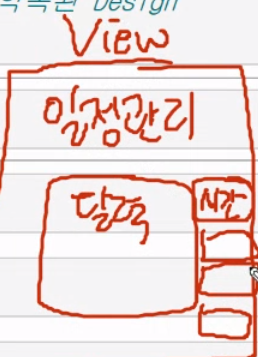

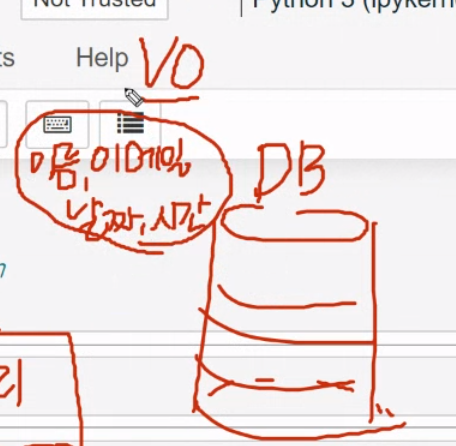

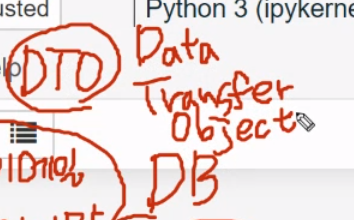

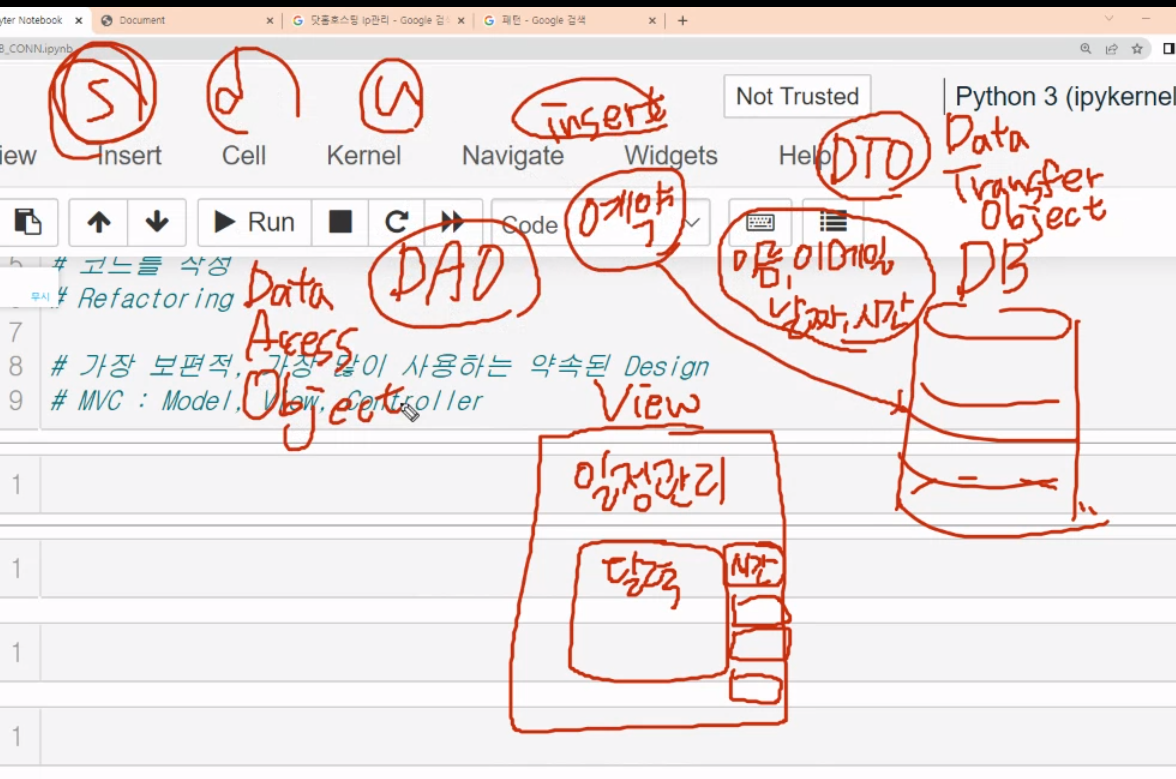

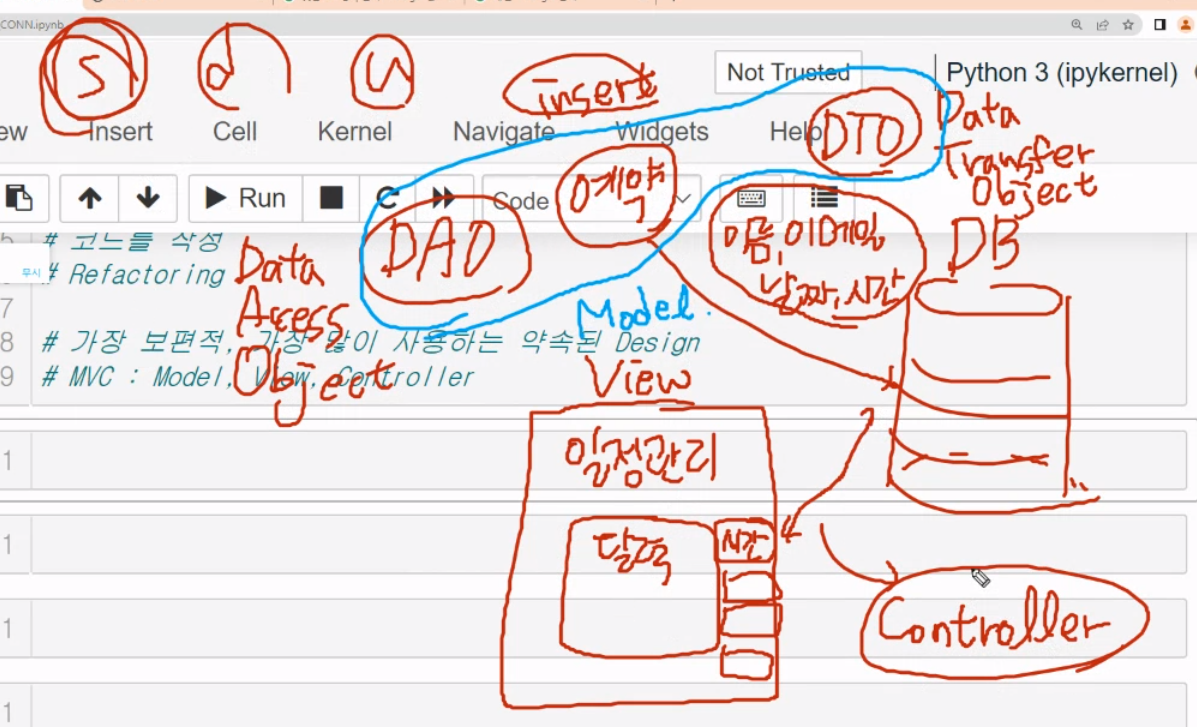

In [4]:
class Scores:
    name=''
    score=0
    
    def print_info(self):
        print('이름:{}/점수:{}'.format(self.name,self.score))
    

In [5]:
s1=Scores()
s1.name='나예호'
s1.score=100

s1.print_info()

이름:나예호/점수:100


In [19]:
from flask import Flask,redirect

app= Flask(__name__)

@app.route('/')
def index():
    #url= 'http://ewise.dothome.co.kr/'
    return "hello world"#redirect(url)

@app.route('/sel_emp')
def sel_emp():
    dao=DAO()
    r=dao.select()
    result='</br>'.join(map(str,r))
    return result

if __name__ == '__main__':
    app.run(host='192.168.70.247', port=5021)
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://192.168.70.247:5021/ (Press CTRL+C to quit)
192.168.70.247 - - [22/Sep/2022 12:19:43] "GET / HTTP/1.1" 200 -
192.168.70.247 - - [22/Sep/2022 12:19:49] "GET /sel_emp HTTP/1.1" 200 -
